Imports required for current project

In [1]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt

In [2]:
def read_data(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values  # Features
    y = data.iloc[:, -1].values   # Target variable
    return X, y

In [3]:
def add_ones(X):
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))

### Normalization function for given Matrix X

In [4]:
def normalize_matrix(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    if np.any(np.std(X, axis=0) == 0):
        raise ValueError("Standard deviation is zero for at least one feature. Normalization is not possible.")

    X_normalized = (X - mean) / std
    return X_normalized, mean, std

#### Running the base functionality

In [5]:
file_path = 'cancer_data.csv'
data = pd.read_csv('cancer_data.csv')

# selecting last column as Y vector
y = data.iloc[:, -1].values.reshape(-1, 1)
# selecting all columns but the last one as X matrix
X = data.iloc[:, :-1]
X = np.asarray(X)
original_y = y.flatten()

# Normalizing the X and checking the rest
X_normalized, x_mean, x_std = normalize_matrix(X)
y, y_mean, y_std = normalize_matrix(original_y)
print("Original X:")
print(X)
print("\nNormalized X:")
print(X_normalized)
print("\nMean of X after normalization:\n", np.mean(X_normalized, axis=0))
print("\nStandard deviation of X after normalization:\n", np.std(X_normalized, axis=0))
print("Original Y:")
print(original_y)
print("\nNormalized Y:")
print(y)
print("\nMean of X after normalization:\n", np.mean(y, axis=0))
print("\nStandard deviation of X after normalization:\n", np.std(y, axis=0))

Original X:
[[ 173.          70.         411.6       ...   33.          32.2
    33.7      ]
 [ 102.          50.         349.7       ...   45.          44.
    45.8      ]
 [ 427.         202.         430.4       ...   42.8         42.2
    43.4      ]
 ...
 [1962.667684    46.         453.5494221 ...   30.9         30.5
    31.2      ]
 [1962.667684    52.         453.5494221 ...   39.          36.9
    40.5      ]
 [1962.667684    48.         453.5494221 ...   26.2         25.5
    27.       ]]

Normalized X:
[[-0.30578546 -0.2298573  -0.67188319 ... -0.2709297  -1.41061897
  -1.59563953]
 [-0.35591665 -0.26953132 -1.8065067  ... -0.00605448  0.84741173
   0.69046646]
 [-0.12644286  0.03199125 -0.32728025 ... -0.05461493  0.50296637
   0.23702395]
 ...
 [ 0.95785094 -0.27746613  0.09704736 ... -0.31728286 -1.73592847
  -2.06797548]
 [ 0.95785094 -0.26556392  0.09704736 ... -0.13849209 -0.51123386
  -0.31088575]
 [ 0.95785094 -0.27349873  0.09704736 ... -0.42102566 -2.69272114
  -2.8

##### The mean of the normalized value would appear to be very close to 0, but not actually 0 due to floating point precision limits

### Compute Hypothesis function for given Matrix X and Theta

In [6]:
def compute_h_theta(X, theta):
    h_theta = np.dot(X, theta.T)
    return h_theta

### Compute J(θ) -> cost for given Matrix X, Vector Y and θ

In [7]:
def compute_j_theta(theta, X, y):
    m = X.shape[0]  # Number of examples
    squared_error = np.sum((compute_h_theta(X, theta) - y) ** 2)
    J_theta = 1 / (2 * m) * squared_error
    return J_theta

### Compute ∇J(θ)

In [8]:
def compute_gradient_j(theta, X, y):
    m = X.shape[0]
    gradient = (1 / m) * np.dot(X.T, (np.dot(X, theta) - y))
    return gradient

### Gradient Descent Algorithm

In [9]:
def gradient_descent(X, y, theta, iterations, alpha):
    J_history = []  # Initialize an empty list to store cost history
    for _ in range(iterations):
        gradient = compute_gradient_j(theta, X, y)
        theta = theta - alpha * gradient
        J = compute_j_theta(theta, X, y)
        J_history.append(J)  # Append the cost to the history list
    return theta, J_history  # Return the final theta and the cost history

#### Settings up base variable 

In [10]:
X_normalized_with_ones = add_ones(X_normalized)
theta_initial = np.zeros(X.shape[1]).flatten()
alpha_values = [0.3, 0.1, 0.01, 0.001]
iterations = 100

#### Running Gradient Descent Algorithm

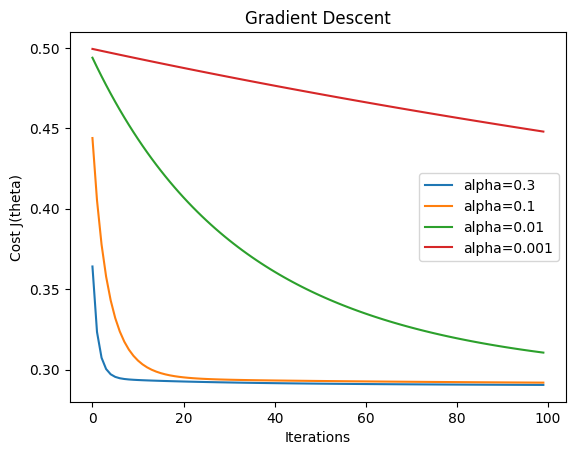

In [11]:
for alpha in alpha_values:
    theta_init = np.zeros(X_normalized_with_ones.shape[1])
    theta_final, J_history = gradient_descent(X_normalized_with_ones, y, theta_init, iterations, alpha)
    plt.plot(range(iterations), J_history, label=f'alpha={alpha}')
plt.xlabel('Iterations')
plt.ylabel('Cost J(theta)')
plt.title('Gradient Descent')
plt.legend()
plt.show()

### Conclusions:
The gradient descent algorithm successfully minimized the cost function for different values of the learning rate (alpha).
As expected, larger values of alpha (e.g., 0.3) may result in faster convergence but risk overshooting the optimal solution,
while smaller values (e.g., 0.001) may converge more slowly but with greater stability.

### Mini batch function

In [12]:
def mini_batch_gradient_descent(X, y, theta, iterations, alpha, batch_size):
    start_time = time.time()
    m = len(y)
    J_history = []
    data_indices = np.random.permutation(m)
    X_updated = X[data_indices]
    y_updated = y[data_indices]
    for _ in range(iterations):
        for batch_index in range(0, m, batch_size):
            X_batch = X_updated[batch_index:batch_index + batch_size]
            y_batch = y_updated[batch_index:batch_index + batch_size]
            gradient = compute_gradient_j(theta, X_batch, y_batch)
            theta = theta - alpha * gradient
            J = compute_j_theta(theta, X, y)
            J_history.append(J)
    # Record the end time
    end_time = time.time()
    # Calculate the execution time
    execution_time = end_time - start_time
    print(f"Execution time (α = {alpha}):", execution_time, "seconds")
    return theta, J_history

#### Running the mini batch code

Execution time (α = 0.3): 0.11789250373840332 seconds
Execution time (α = 0.1): 0.12104034423828125 seconds
Execution time (α = 0.01): 0.12764382362365723 seconds
Execution time (α = 0.001): 0.12385797500610352 seconds


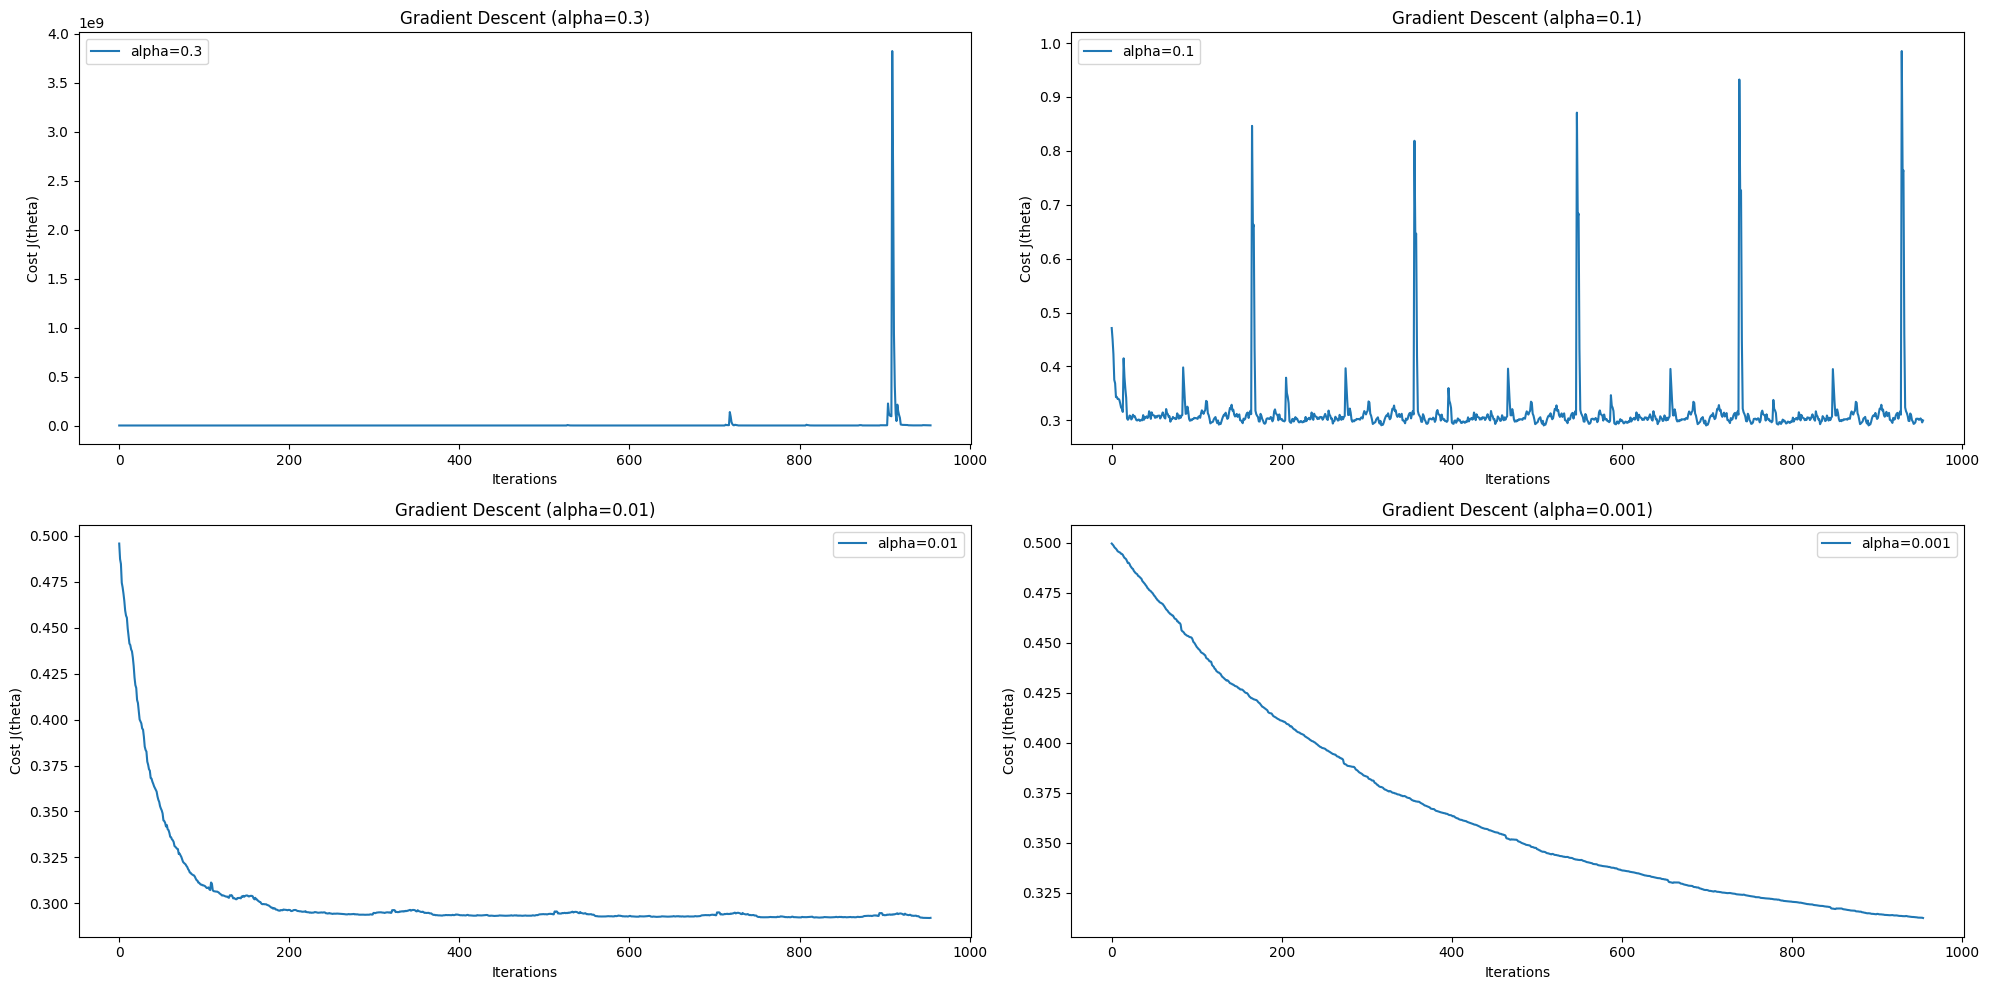

In [13]:
batch_size = 16
batch_iterations = 5
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, alpha in enumerate(alpha_values):
    row = i // 2
    col = i % 2
    axes[row, col].set_xlabel('Number of Iterations')
    theta_init = np.zeros(X_normalized_with_ones.shape[1]).flatten()
    theta_final, J_history_mini_batch = mini_batch_gradient_descent(X_normalized_with_ones, y, theta_init, batch_iterations, alpha, batch_size)

    axes[row, col].plot(range(len(J_history_mini_batch)), J_history_mini_batch, label=f'alpha={alpha}')
    axes[row, col].set_xlabel('Iterations')
    axes[row, col].set_ylabel('Cost J(theta)')
    axes[row, col].set_title(f'Gradient Descent (alpha={alpha})')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

### Conclusions:
Mini-batch gradient descent introduces randomness by updating parameters using small batches of data at each iteration.
It often offers faster convergence compared to standard gradient descent,
especially for large datasets, as it can take advantage of vectorization and parallel processing.

### SVD

In [14]:
def svd(X, k_components):
    U, s, VT = np.linalg.svd(X, full_matrices=False)
    return np.dot(X, VT[:k_components,:].T)

In [15]:
X_svd = svd(X_normalized, 3)
x_svd_with_ones = add_ones(X_svd)
x_svd_with_ones

array([[ 1.        ,  0.2146138 ,  1.93551655, -1.0490741 ],
       [ 1.        , -0.76079998, -1.0411961 , -0.14086246],
       [ 1.        , -0.3166987 , -0.32840398,  0.31941214],
       ...,
       [ 1.        ,  1.16478237,  1.94870714, -1.47953575],
       [ 1.        ,  0.55794342,  0.08916476, -0.66717153],
       [ 1.        ,  1.35175322,  3.1296965 , -1.60800299]])

Execution time (α = 0.3): 0.12220454216003418 seconds
Execution time (α = 0.1): 0.1205449104309082 seconds
Execution time (α = 0.01): 0.1240541934967041 seconds
Execution time (α = 0.001): 0.11778736114501953 seconds


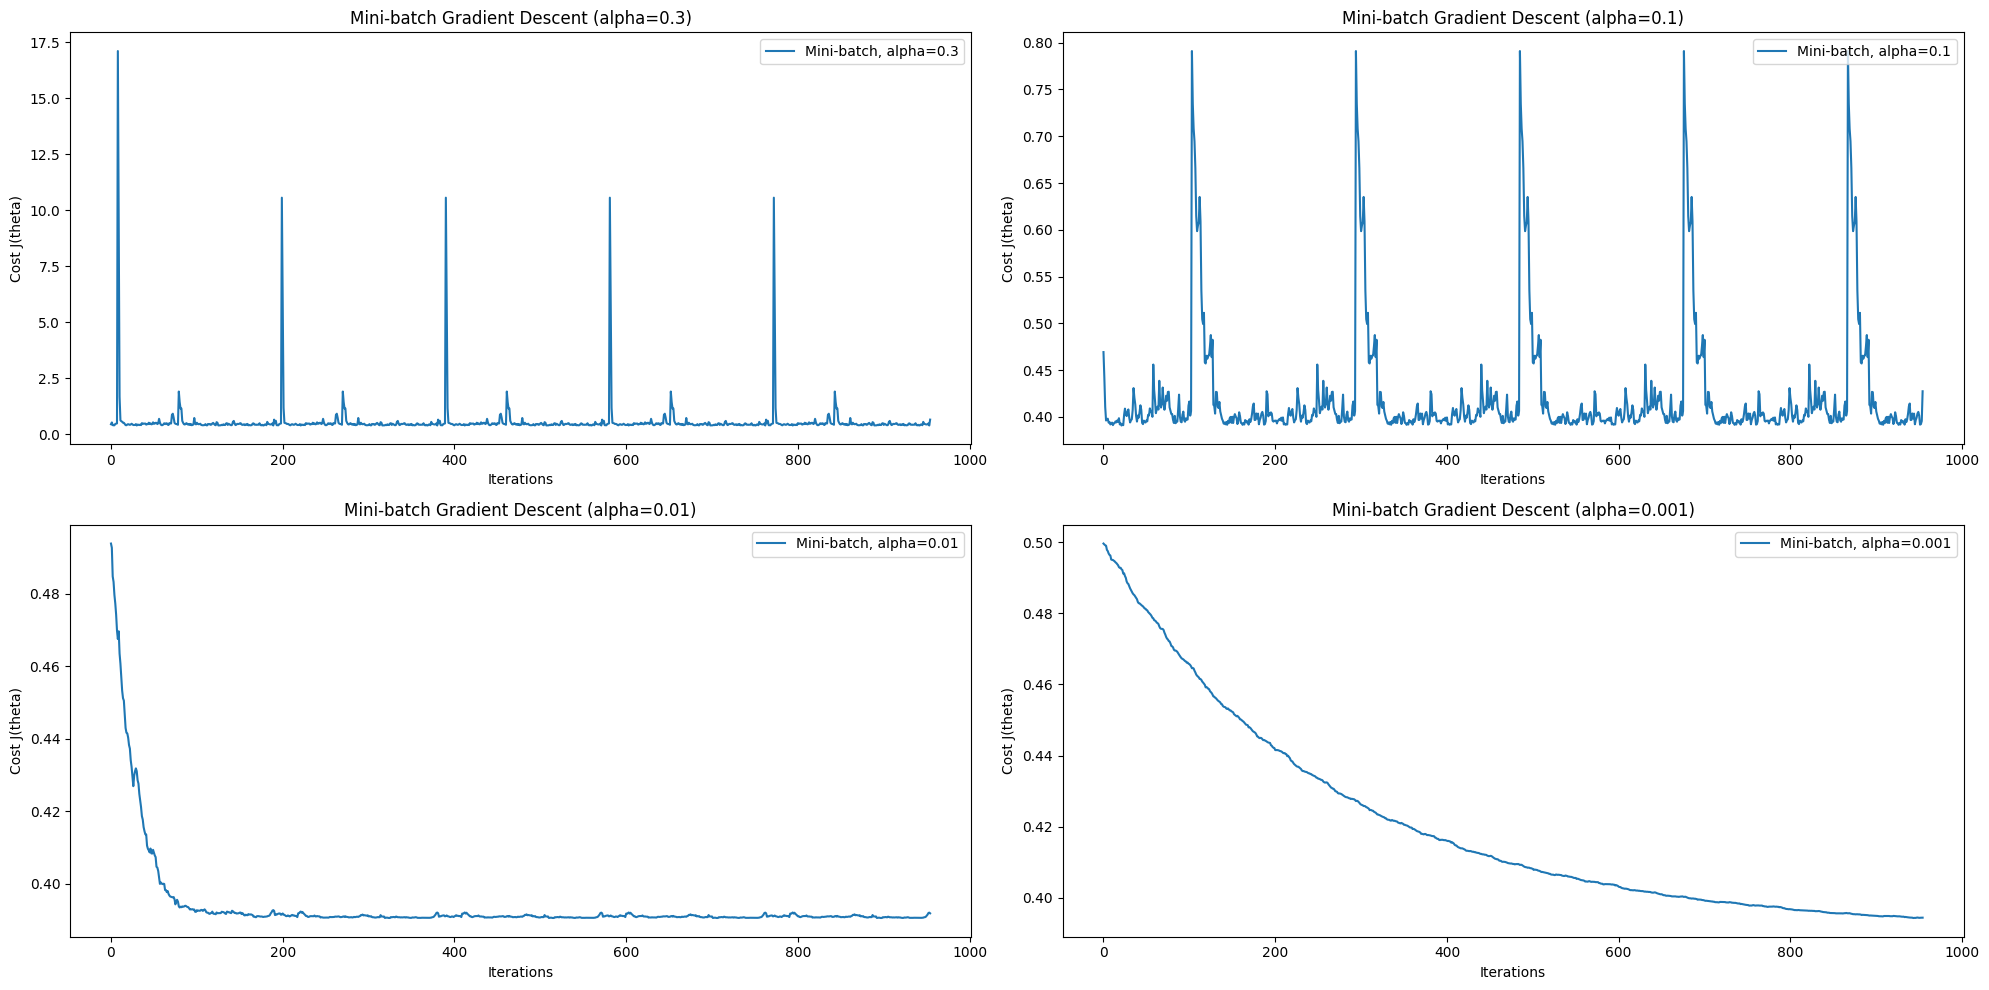

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
for i, alpha in enumerate(alpha_values):
    row = i // 2
    col = i % 2
    axes[row, col].set_xlabel('Number of Iterations')
    theta_init = np.zeros(x_svd_with_ones.shape[1]).flatten()
    theta_final, J_history_mini_batch = mini_batch_gradient_descent(x_svd_with_ones, y, theta_init, batch_iterations, alpha, batch_size)

    axes[row, col].plot(range(len(J_history_mini_batch)), J_history_mini_batch, label=f'Mini-batch, alpha={alpha}')
    axes[row, col].set_xlabel('Iterations')
    axes[row, col].set_ylabel('Cost J(theta)')
    axes[row, col].set_title(f'Mini-batch Gradient Descent (alpha={alpha})')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

### Conclusions:
By reducing the dimensionality of the feature matrix using SVD, the computational complexity of the problem is reduced while preserving the most important features.
However due to the decrease some information may be lost which can cause higher jumps in the mini batch graph